In [103]:
import numpy as np
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from regionFrance import *
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
import plotly.graph_objects as go

%matplotlib inline

## Chiffre clé COVID 19

Import data

In [104]:
url_chiffre_cle = 'https://raw.githubusercontent.com/opencovid19-fr/data/master/dist/chiffres-cles.csv'

chiffre_france=pd.read_csv(url_chiffre_cle)
chiffre_france["date"] = pd.to_datetime(chiffre_france["date"])

chiffre_france.sort_values("date", inplace=True)
chiffre_france.tail()

date  granularite maille_code        maille_nom  cas_confirmes  \
3156 2020-03-23  departement      DEP-43       Haute-Loire           15.0   
3157 2020-03-23  departement      DEP-43       Haute-Loire            NaN   
3158 2020-03-23  departement      DEP-44  Loire-Atlantique            NaN   
3160 2020-03-23  departement      DEP-45            Loiret            NaN   
3273 2020-03-23        monde       WORLD             Monde       338307.0   

        deces  reanimation  hospitalises  gueris                  source_nom  \
3156      0.0          NaN           NaN     NaN    ARS Auvergne-Rhône-Alpes   
3157      0.0          3.0           7.0     7.0  Santé publique France Data   
3158      3.0         15.0          57.0    14.0  Santé publique France Data   
3160      2.0         16.0          43.0    11.0  Santé publique France Data   
3273  14602.0          NaN           NaN     NaN       Santé publique France   

                                             source_url  \
3156  https://www.auvergne-rhone-alpes.ars.sante.fr/...   
3157                                                NaN   
3158                                                NaN   
3160                                                NaN   
3273  https://www.santepubliquefrance.fr/maladies-et...   

                     source_type  
3156    agences-regionales-sante  
3157  sante-publique-france-data  
3158  sante-publique-france-data  
3160  sante-publique-france-data  
3273       sante-publique-france

Filter on department only

In [105]:
chiffre_dep=chiffre_france[chiffre_france['maille_code'].str.contains('DEP')]

In [106]:
chiffre_dep[chiffre_dep['maille_code']=='DEP-75']

date  granularite maille_code maille_nom  cas_confirmes  deces  \
486  2020-03-05  departement      DEP-75      Paris           17.0    NaN   
605  2020-03-06  departement      DEP-75      Paris           19.0    NaN   
719  2020-03-07  departement      DEP-75      Paris           21.0    NaN   
835  2020-03-08  departement      DEP-75      Paris           26.0    NaN   
936  2020-03-09  departement      DEP-75      Paris           27.0    NaN   
1052 2020-03-10  departement      DEP-75      Paris           44.0    NaN   
1191 2020-03-11  departement      DEP-75      Paris           80.0    NaN   
1335 2020-03-12  departement      DEP-75      Paris          126.0    NaN   
2118 2020-03-18  departement      DEP-75      Paris            NaN   14.0   
2346 2020-03-19  departement      DEP-75      Paris            NaN   22.0   
2565 2020-03-20  departement      DEP-75      Paris            NaN   30.0   
2792 2020-03-21  departement      DEP-75      Paris            NaN   36.0   
3006 2020-03-22  departement      DEP-75      Paris            NaN   40.0   
3197 2020-03-23  departement      DEP-75      Paris            NaN   59.0   

      reanimation  hospitalises  gueris                  source_nom  \
486           NaN           NaN     NaN           ARS Ile-de-France   
605           NaN           NaN     NaN           ARS Ile-de-France   
719           NaN           NaN     NaN           ARS Ile-de-France   
835           NaN           NaN     NaN           ARS Ile-de-France   
936           NaN           NaN     NaN           ARS Ile-de-France   
1052          NaN           NaN     NaN           ARS Ile-de-France   
1191          NaN           NaN     NaN           ARS Ile-de-France   
1335          NaN           NaN     NaN           ARS Ile-de-France   
2118        105.0         359.0    40.0  Santé publique France Data   
2346        122.0         453.0    62.0  Santé publique France Data   
2565        145.0         575.0    98.0  Santé publique France Data   
2792        165.0         649.0   122.0  Santé publique France Data   
3006        195.0         728.0   145.0  Santé publique France Data   
3197        223.0         925.0   198.0  Santé publique France Data   

                                             source_url  \
486   https://www.iledefrance.ars.sante.fr/system/fi...   
605   https://www.iledefrance.ars.sante.fr/system/fi...   
719   https://www.iledefrance.ars.sante.fr/system/fi...   
835   https://www.iledefrance.ars.sante.fr/system/fi...   
936   https://www.iledefrance.ars.sante.fr/system/fi...   
1052  https://www.iledefrance.ars.sante.fr/system/fi...   
1191  https://www.iledefrance.ars.sante.fr/system/fi...   
1335  https://www.iledefrance.ars.sante.fr/system/fi...   
2118                                                NaN   
2346                                                NaN   
2565                                                NaN   
2792                                                NaN   
3006                                                NaN   
3197                                                NaN   

                     source_type  
486     agences-regionales-sante  
605     agences-regionales-sante  
719     agences-regionales-sante  
835     agences-regionales-sante  
936     agences-regionales-sante  
1052    agences-regionales-sante  
1191    agences-regionales-sante  
1335    agences-regionales-sante  
2118  sante-publique-france-data  
2346  sante-publique-france-data  
2565  sante-publique-france-data  
2792  sante-publique-france-data  
3006  sante-publique-france-data  
3197  sante-publique-france-data

## Map of cases in France

In [107]:
cas_par_dep= chiffre_dep.groupby('maille_nom').sum().sort_values('cas_confirmes')
cas_par_dep=cas_par_dep.reset_index()
cas_par_dep.tail()

maille_nom  cas_confirmes  deces  reanimation  hospitalises  gueris
96       Haute-Savoie         2242.0  101.0         78.0         337.0   378.0
97           Morbihan         2496.0   95.0         78.0         336.0   238.0
98              Rhône         2690.0  293.0        254.0        1509.0   367.0
99   Bouches-du-Rhône         3038.0   24.0        195.0        1161.0   693.0
100         Haut-Rhin         4106.0  694.0        525.0        3006.0  1067.0

In [108]:
inv_map = {v: k for k, v in DEPARTMENTS.items()}

cas_par_dep['num_depart']=cas_par_dep['maille_nom'].map(inv_map)

cas_par_dep.at[36,'num_depart']=91
cas_par_dep.at[1,'num_depart']=65

dict_cas_depart = dict(zip(cas_par_dep['num_depart'].values.tolist(),cas_par_dep['cas_confirmes']))

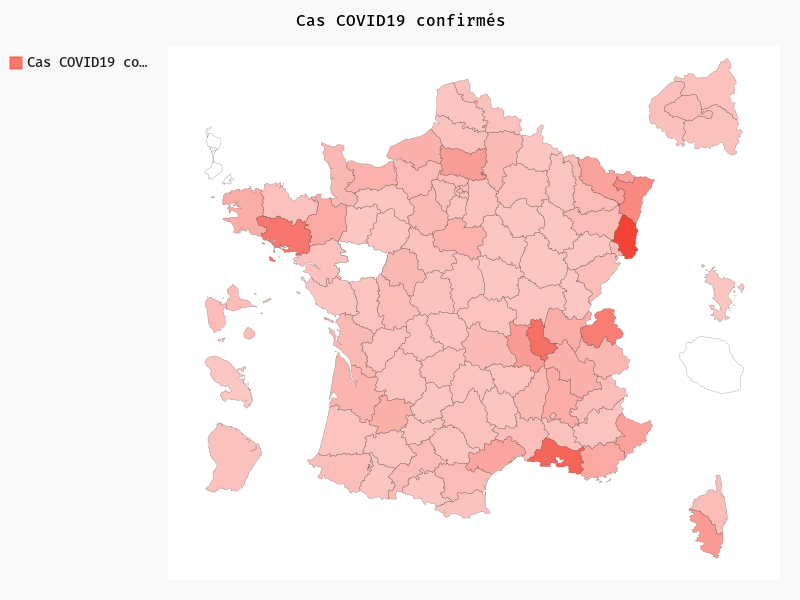

In [109]:
import pygal
fr_chart = pygal.maps.fr.Departments()
fr_chart.title = 'Cas COVID19 confirmés'

fr_chart.add('Cas COVID19 confirmés', dict_cas_depart)

## Scatter plot method for map

In [243]:
# load a set of data
geo = pd.read_csv('Data/insee-map.csv', sep=';',
                 usecols=range(10),
                index_col='Code INSEE')
geo[['Latitude', 'Longitude']] = geo['geo_point_2d'].str.extract('(.+),(.+)', expand=True).astype(float)
geo.head()

Code Postal               Commune     Département         Région  \
Code INSEE                                                                    
91645            91370  VERRIERES-LE-BUISSON         ESSONNE  ILE-DE-FRANCE   
77133            77126  COURCELLES-EN-BASSEE  SEINE-ET-MARNE  ILE-DE-FRANCE   
91378            91730             MAUCHAMPS         ESSONNE  ILE-DE-FRANCE   
77243            77400       LAGNY-SUR-MARNE  SEINE-ET-MARNE  ILE-DE-FRANCE   
77414            77160        SAINT-HILLIERS  SEINE-ET-MARNE  ILE-DE-FRANCE   

                      Statut  Altitude Moyenne  Superficie  Population  \
Code INSEE                                                               
91645         Commune simple             121.0       999.0        15.5   
77133         Commune simple              88.0      1082.0         0.2   
91378         Commune simple             150.0       313.0         0.3   
77243       Chef-lieu canton              71.0       579.0        20.2   
77414         Commune simple             158.0      1907.0         0.4   

                           geo_point_2d   Latitude  Longitude  
Code INSEE                                                     
91645         48.75044312,2.25171297214  48.750443   2.251713  
77133       48.4125606521,3.05294050556  48.412561   3.052941  
91378       48.5272680908,2.19718165044  48.527268   2.197182  
77243       48.8730701858,2.70978081313  48.873070   2.709781  
77414       48.6289146411,3.25823552684  48.628915   3.258236

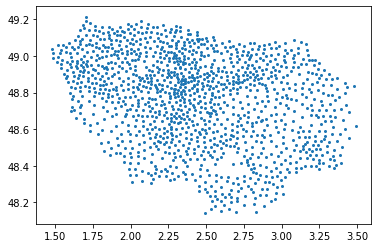

In [244]:
# scatter plot provides naive maps
plt.scatter(geo['Longitude'],
            geo['Latitude'],s=4)

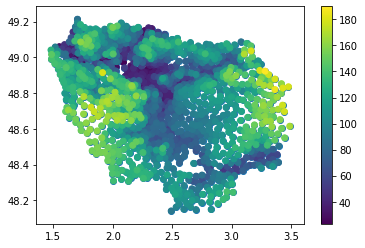

In [245]:
# Metropolitan France
metro = geo.loc[geo['Latitude'] > 40]
plt.scatter(metro['Longitude'],
            metro['Latitude'])

metro = metro.sort_values('Altitude Moyenne')
plt.scatter(metro['Longitude'],
            metro['Latitude'],
            c=metro['Altitude Moyenne'],
            cmap=plt.cm.viridis)
plt.colorbar()

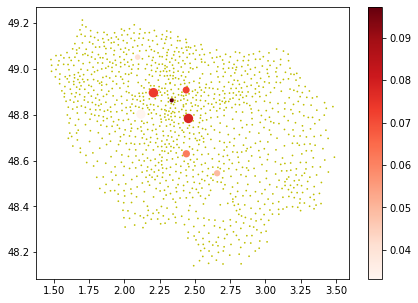

In [246]:
geo['Densité'] = geo['Population'] / geo['Superficie']

status = list(geo['Statut'].value_counts().index)

if pd.__version__ < '0.21.0':
    geo['Statut'] = geo['Statut'].astype('category', categories=status, ordered=True)
else:
    from pandas.api.types import CategoricalDtype
    cat_status = CategoricalDtype(categories=status, ordered=True)
    geo['Statut'] = geo['Statut'].astype(cat_status)

metro = geo.loc[geo['Latitude'] > 40]

# Noms des préfectures de région
plt.figure(figsize=(7, 5))
metro_A = metro.loc[metro["Statut"] >= "Préfecture"]
metro_A = metro_A.sort_values("Population", ascending=False)
metro_B = metro.loc[metro["Statut"] < "Préfecture"]

# communes
plt.scatter(metro_B["Longitude"],
            metro_B["Latitude"],
            c='y',
            s=3,
            edgecolors='none')

# préfectures
ax = plt.scatter(metro_A["Longitude"],
                metro_A["Latitude"],
                c=metro_A["Densité"],
                s=metro_A["Population"],
                cmap=plt.cm.Reds,
                edgecolors='none')

## noms des préfectures de région hors PLM
#metro_C = metro.loc[(metro["Statut"] >= "Préfecture de région") & ~metro["Commune"].str.contains("ARRONDISSEMENT")]
#for i, row in metro_C.iterrows():
#    plt.text(row["Longitude"],
#                 row["Latitude"],
#                 row["Commune"].title(),
#                 fontsize=8)
#    
plt.colorbar(ax);

## Folium

In [321]:
import folium

In [323]:
coords = (48.8398094,2.5840685)
map = folium.Map(location=coords, zoom_start=15)

In [324]:
geo.head()

Code Postal               Commune     Département         Région  \
Code INSEE                                                                    
91645            91370  VERRIERES-LE-BUISSON         ESSONNE  ILE-DE-FRANCE   
77133            77126  COURCELLES-EN-BASSEE  SEINE-ET-MARNE  ILE-DE-FRANCE   
91378            91730             MAUCHAMPS         ESSONNE  ILE-DE-FRANCE   
77243            77400       LAGNY-SUR-MARNE  SEINE-ET-MARNE  ILE-DE-FRANCE   
77414            77160        SAINT-HILLIERS  SEINE-ET-MARNE  ILE-DE-FRANCE   

                      Statut  Altitude Moyenne  Superficie  Population  \
Code INSEE                                                               
91645         Commune simple             121.0       999.0        15.5   
77133         Commune simple              88.0      1082.0         0.2   
91378         Commune simple             150.0       313.0         0.3   
77243       Chef-lieu canton              71.0       579.0        20.2   
77414         Commune simple             158.0      1907.0         0.4   

                           geo_point_2d   Latitude  Longitude   Densité  
Code INSEE                                                               
91645         48.75044312,2.25171297214  48.750443   2.251713  0.015516  
77133       48.4125606521,3.05294050556  48.412561   3.052941  0.000185  
91378       48.5272680908,2.19718165044  48.527268   2.197182  0.000958  
77243       48.8730701858,2.70978081313  48.873070   2.709781  0.034888  
77414       48.6289146411,3.25823552684  48.628915   3.258236  0.000210

In [325]:
chiffre_dep.head()

date  granularite maille_code            maille_nom  cas_confirmes  \
0  2020-01-24  departement      DEP-16              Charente            0.0   
12 2020-01-24  departement      DEP-87          Haute-Vienne            0.0   
11 2020-01-24  departement      DEP-86                Vienne            0.0   
9  2020-01-24  departement      DEP-64  Pyrénées-Atlantiques            0.0   
10 2020-01-24  departement      DEP-79           Deux-Sèvres            0.0   

    deces  reanimation  hospitalises  gueris              source_nom  \
0     NaN          NaN           NaN     NaN  ARS Nouvelle-Aquitaine   
12    NaN          NaN           NaN     NaN  ARS Nouvelle-Aquitaine   
11    NaN          NaN           NaN     NaN  ARS Nouvelle-Aquitaine   
9     NaN          NaN           NaN     NaN  ARS Nouvelle-Aquitaine   
10    NaN          NaN           NaN     NaN  ARS Nouvelle-Aquitaine   

                                           source_url  \
0   https://www.nouvelle-aquitaine.ars.sante.fr/co...   
12  https://www.nouvelle-aquitaine.ars.sante.fr/co...   
11  https://www.nouvelle-aquitaine.ars.sante.fr/co...   
9   https://www.nouvelle-aquitaine.ars.sante.fr/co...   
10  https://www.nouvelle-aquitaine.ars.sante.fr/co...   

                 source_type  
0   agences-regionales-sante  
12  agences-regionales-sante  
11  agences-regionales-sante  
9   agences-regionales-sante  
10  agences-regionales-sante

In [96]:
STATIONS = ['ABBEVILLE']

LATS = [50.136]

LONGS = [1.834]

TEMPS = [7.6]

for i in range(len(STATIONS)):
    folium.CircleMarker(
        location = (LATS[i], LONGS[i]),
        radius = TEMPS[i]*2,
        color = 'crimson',
        fill = True,
        fill_color = 'crimson'
    ).add_to(map)

## Plotly map

In [6]:
df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2014_us_cities.csv')
df.head()

name      pop        lat         lon
0      New York   8287238  40.730599  -73.986581
1   Los Angeles   3826423  34.053717 -118.242727
2       Chicago   2705627  41.875555  -87.624421
3       Houston   2129784  29.758938  -95.367697
4  Philadelphia   1539313  39.952335  -75.163789

In [119]:
cas_par_dep.tail()

maille_nom  cas_confirmes  deces  reanimation num_depart
96              Rhône         1480.0   77.0         12.0         69
97   Bouches-du-Rhône         1639.0    0.0          0.0         13
98           Bas-Rhin         1876.0    3.0          0.0         67
99           Morbihan         2165.0   28.0          0.0         56
100         Haut-Rhin         4106.0   10.0          0.0         68

In [145]:
chiffre_reg = chiffre_france[chiffre_france['granularite']=="region"]
chiffre_reg = chiffre_reg.groupby("maille_nom").max().sort_values('cas_confirmes')
chiffre_reg

date granularite maille_code  cas_confirmes  \
maille_nom                                                                     
Auvergne Rhône-Alpes       2020-02-20      region      REG-84            6.0   
Mayotte                    2020-03-22      region      REG-06           14.0   
Guyane                     2020-03-22      region      REG-03           20.0   
Martinique                 2020-03-22      region      REG-02           44.0   
Guadeloupe                 2020-03-22      region      REG-01           58.0   
La Réunion                 2020-03-22      region      REG-04           64.0   
Corse                      2020-03-22      region      REG-94          183.0   
Pays de la Loire           2020-03-22      region      REG-52          270.0   
Centre-Val de Loire        2020-03-22      region      REG-24          291.0   
Bretagne                   2020-03-22      region      REG-53          397.0   
Normandie                  2020-03-22      region      REG-28          462.0   
Nouvelle-Aquitaine         2020-03-22      region      REG-75          612.0   
Occitanie                  2020-03-22      region      REG-76          671.0   
Hauts-de-France            2020-03-22      region      REG-32          943.0   
Bourgogne-Franche-Comté    2020-03-22      region      REG-27         1178.0   
Provence-Alpes-Côte d’Azur 2020-03-22      region      REG-93         1372.0   
Auvergne-Rhône-Alpes       2020-03-22      region      REG-84         1431.0   
Grand-Est                  2020-03-22      region      REG-44         3395.0   
Ile-de-France              2020-03-22      region      REG-11         5283.0   

                            deces  reanimation  hospitalises  gueris  \
maille_nom                                                             
Auvergne Rhône-Alpes          0.0          NaN           6.0     NaN   
Mayotte                       NaN          1.0           4.0     NaN   
Guyane                        0.0          NaN           NaN     6.0   
Martinique                    NaN          7.0           1.0     NaN   
Guadeloupe                    1.0          5.0          14.0     NaN   
La Réunion                    NaN          NaN           NaN     NaN   
Corse                         7.0          2.0           NaN     0.0   
Pays de la Loire              3.0         25.0           NaN     4.0   
Centre-Val de Loire           2.0         21.0           NaN     NaN   
Bretagne                     15.0         27.0         116.0     NaN   
Normandie                     9.0          NaN         126.0     NaN   
Nouvelle-Aquitaine            8.0          NaN           1.0     2.0   
Occitanie                    27.0         72.0         208.0     3.0   
Hauts-de-France              97.0          NaN           NaN     NaN   
Bourgogne-Franche-Comté      28.0         73.0         240.0    25.0   
Provence-Alpes-Côte d’Azur   15.0         85.0         178.0     NaN   
Auvergne-Rhône-Alpes         72.0          4.0          47.0     8.0   
Grand-Est                   230.0        435.0        1767.0   357.0   
Ile-de-France                 4.0        155.0           5.0     NaN   

                                       source_nom            source_type  
maille_nom                                                                
Auvergne Rhône-Alpes        Santé publique France  sante-publique-france  
Mayotte                     Santé publique France  sante-publique-france  
Guyane                      Santé publique France  sante-publique-france  
Martinique                  Santé publique France  sante-publique-france  
Guadeloupe                  Santé publique France  sante-publique-france  
La Réunion                  Santé publique France  sante-publique-france  
Corse                       Santé publique France  sante-publique-france  
Pays de la Loire            Santé publique France  sante-publique-france  
Centre-Val de Loire         Santé publique France  sante-publique-france  
Bretagne      

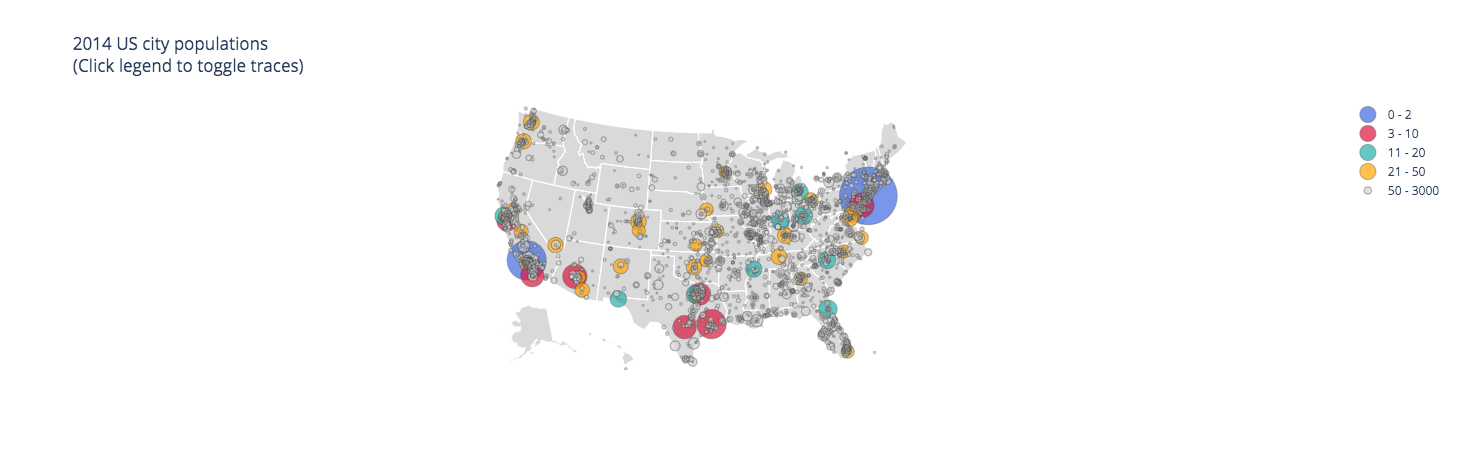

In [98]:
import plotly.graph_objects as go

import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2014_us_cities.csv')
df.head()

df['text'] = df['name'] + '<br>Population ' + (df['pop']/1e6).astype(str)+' million'
limits = [(0,2),(3,10),(11,20),(21,50),(50,3000)]
colors = ["royalblue","crimson","lightseagreen","orange","lightgrey"]
cities = []
scale = 5000

fig = go.Figure()

for i in range(len(limits)):
    lim = limits[i]
    df_sub = df[lim[0]:lim[1]]
    fig.add_trace(go.Scattergeo(
        locationmode = 'USA-states',
        lon = df_sub['lon'],
        lat = df_sub['lat'],
        text = df_sub['text'],
        marker = dict(
            size = df_sub['pop']/scale,
            color = colors[i],
            line_color='rgb(40,40,40)',
            line_width=0.5,
            sizemode = 'area'
        ),
        name = '{0} - {1}'.format(lim[0],lim[1])))

fig.update_layout(
        title_text = '2014 US city populations<br>(Click legend to toggle traces)',
        showlegend = True,
        geo = dict(
            scope = 'usa',
            landcolor = 'rgb(217, 217, 217)',
        )
    )

fig.show()

## Ratio des décès en France

In [7]:
deces = chiffre_france[chiffre_france["maille_nom"] == "France"][[
    "date", "cas_confirmes", "deces"
]]
deces.set_index("date", inplace=True)

deces["ratio"] = deces.deces / deces.cas_confirmes
deces

cas_confirmes  deces     ratio
date                                      
2020-01-24            3.0    0.0  0.000000
2020-01-24            3.0    0.0  0.000000
2020-01-25            3.0    NaN       NaN
2020-01-26            3.0    NaN       NaN
2020-01-27            3.0    0.0  0.000000
...                   ...    ...       ...
2020-03-22        16689.0  674.0  0.040386
2020-03-22            NaN  632.0       NaN
2020-03-22        16689.0  674.0  0.040386
2020-03-23        19856.0  860.0  0.043312
2020-03-23        19856.0  860.0  0.043312

[94 rows x 3 columns]

In [8]:
deces.ratio.mean() * 100

2.360088660453059

La moyenne des pourcentage de décès par jour est à peu près de **1.75%.**

## Ratio de décès dans le monde

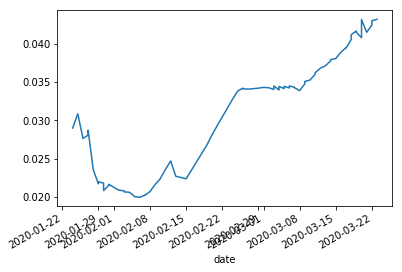

In [18]:
deces = chiffre_france[chiffre_france["maille_nom"] == "Monde"][["date", "cas_confirmes", "deces"]]
deces.set_index("date", inplace=True)

deces["ratio"] = deces.deces / deces.cas_confirmes
deces.ratio.plot()

## Patient analysis for death

In [19]:
patient_list = pd.read_csv("Data/COVID19_line_list_data.csv")
patient_list["death"].fillna("0", inplace=True)

In [20]:
def is_dead(x):
    if "Death" in str(x).split() or "death" in str(x).split():
        return 1
    return 0


patient_list["is_dead"] = patient_list["summary"].apply(is_dead)

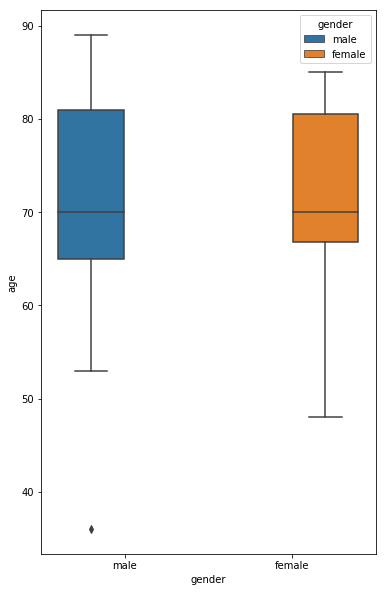

In [21]:
plt.figure(figsize=(6, 10))
sns.boxplot(x="gender",
            y="age",
            hue="gender",
            data=patient_list[patient_list["is_dead"] == 1])

# Recovered & Deaths data

In [27]:
import pandas as pd
import io
import requests

url_confirmed="https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv"
url_recovered="https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv"
url_deaths="https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv"

confirmed = pd.read_csv(url_confirmed)
recovered = pd.read_csv(url_recovered)
deaths = pd.read_csv(url_deaths)

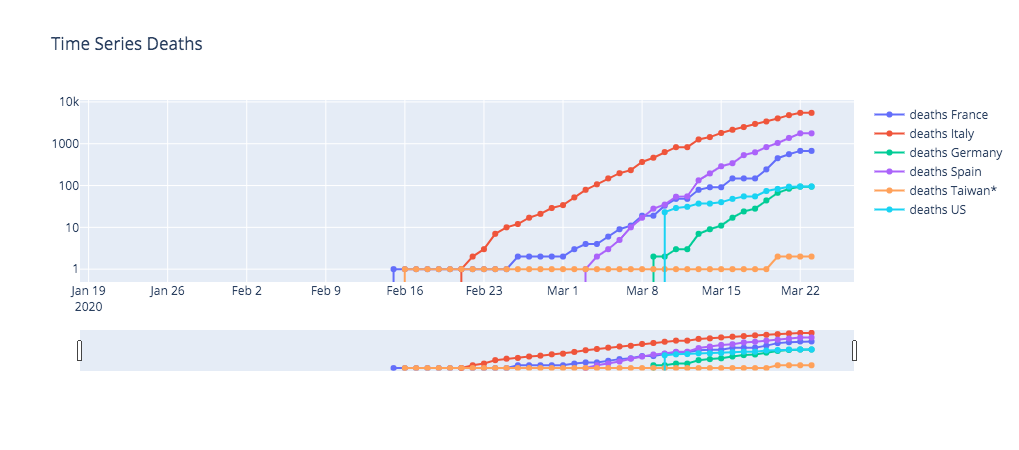

In [28]:
countries =['France','Italy','Germany','Spain','Taiwan*','US']

#fig, ax = plt.subplots(1, 1, figsize=(10, 6))
#ax.set_yscale("log")

fig = go.Figure()
#fig.add_trace(go.Scatter(x=df.Date, y=df['AAPL.High'], name="AAPL High",)



for l in countries:
    r = recovered[recovered['Country/Region'] == l].iloc[0][4:]
    r.index=pd.to_datetime(r.index)
    r.name ='recovered '+l
    c = confirmed[confirmed['Country/Region'] == l].iloc[0][4:]
    c.index=pd.to_datetime(c.index)
    c.name ='confirmed '+l
    d = deaths[deaths['Country/Region'] == l].iloc[0][4:]
    d.index=pd.to_datetime(d.index)
    d.name='deaths '+l
    
    l_data = pd.DataFrame([r]).transpose()
              
    fig.add_trace(go.Scatter(x=l_data.index, y=d.values, name=d.name,  mode = 'lines+markers'))

fig.update_layout(title_text='Time Series Deaths',yaxis_type="log",
                  xaxis_rangeslider_visible=True)
fig.show()

## Delta deaths per day

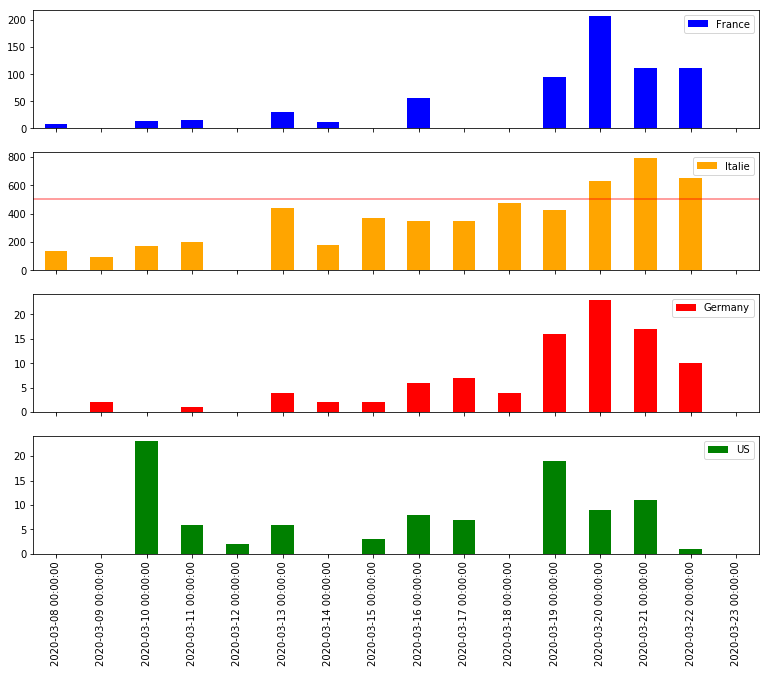

In [29]:
fig, ax = plt.subplots(4, 1, figsize=(13, 10),sharex=True)

fr_deaths = deaths[deaths['Country/Region']=='France'].iloc[0][4:]
fr_deaths.index =pd.to_datetime(fr_deaths.index)
fr_deaths.diff()['2020-03-08':].plot.bar(ax=ax[0], label="France",color='Blue',rot=90)

italy_deaths = deaths[deaths['Country/Region']=='Italy'].iloc[0][4:]
italy_deaths.index =pd.to_datetime(italy_deaths.index)
italy_deaths.diff()['2020-03-08':].plot.bar(ax=ax[1], label="Italie",color='orange',rot=90)

ger_deaths = deaths[deaths['Country/Region']=='Germany'].iloc[0][4:]
ger_deaths.index =pd.to_datetime(ger_deaths.index)
ger_deaths.diff()['2020-03-08':].plot.bar(ax=ax[2], label="Germany",color='red',rot=90)

us_deaths = deaths[deaths['Country/Region']=='US'].iloc[0][4:]
us_deaths.index =pd.to_datetime(us_deaths.index)
us_deaths.diff()['2020-03-08':].plot.bar(ax=ax[3], label="US",color='Green',rot=90)


ax[0].legend(loc="best")
ax[1].legend(loc="best")
ax[1].axhline(y=500, color="red", alpha=0.5)

ax[2].legend(loc="best")
ax[3].legend(loc="best")
